# Unsupervised Learning

Author: Nirta Ika Yunita
<br>Date: November 11, 2019

1. Select att1 and att2 from train.csv and test.csv data. 
<br>This step will result a new data frame or a table with size of 10,000 rows and 2 columns.
<br>Perform clustering using at least 3 algorithms (K-Means Clustering, Hierarchical Clustering, and DBSCAN) to cluster that new data frame.
<br>
<br>
2. Assume that the dataset you are working is the employee data, whether 
<br>att1 is satisfaction level (the higher the satisfaction level, the more satisfy a person does in his employment)
<br>att2 is evaluation result (the higher the evaluation result, the better/harder a person works in the company).
<br>Can you name the clusters that you have just made?

## Load Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
d_train = pd.read_csv('train.csv')
d_test = pd.read_csv('test.csv')

In [3]:
d_train.head()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,...,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,att10
0,0.16,0.82,6,202,4,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.43,0.48,2,153,3,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0.39,0.54,2,127,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0.73,1.00,5,253,6,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0.44,0.46,2,149,3,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [4]:
d_test.head()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,att8d,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c
0,0.66,0.62,4,250,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0.66,0.50,4,263,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0.32,0.74,3,211,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.37,0.57,2,155,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.41,0.49,2,130,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [5]:
print('Train data shape {}' .format(d_train.shape))
print('Test data shape {}' .format(d_test.shape))

Train data shape (8000, 21)
Test data shape (2000, 20)


In [6]:
d_train = d_train[['att1', 'att2']]
d_test = d_test[['att1', 'att2']]

In [7]:
data = pd.concat([d_train, d_test])
data.head()

,att1,att2
0,0.16,0.82
1,0.43,0.48
2,0.39,0.54
3,0.73,1.00
4,0.44,0.46


In [8]:
print('Data shape {}' .format(data.shape))

Data shape (10000, 2)


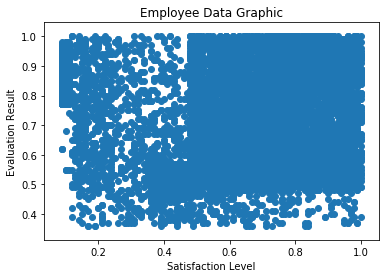

In [9]:
plt.scatter(data['att1'], data['att2'], label = 'True Position')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Graphic")
plt.show()

## K-Means Clustering

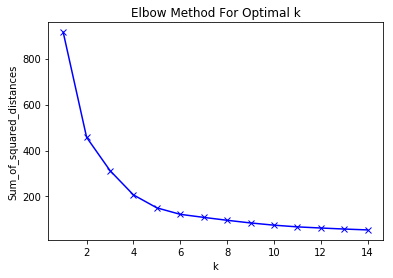

In [10]:
from sklearn.cluster import KMeans

Sum_of_squared_distance = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(data)
    Sum_of_squared_distance.append(km.inertia_)

plt.plot(K, Sum_of_squared_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As we seen from the elbow graph, we choose k = 4.

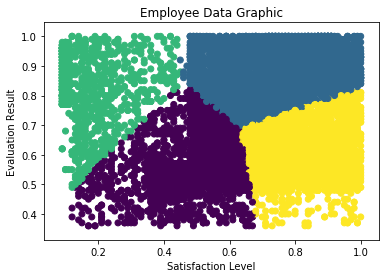

In [11]:
km = KMeans (n_clusters = 4)
km.fit(data)
plt.scatter(data['att1'], data['att2'], c = km.labels_)
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Graphic")
plt.show()

There are 4 clusters:
<br>1. Blue = hard-worker employees with high satisfaction
<br>2. Green = hard-worker employees with low satisfaction
<br>3. Yellow = lazy employees with high satisfaction
<br>4. Purple = lazy employees with low satisfaction

Cluster purple is dominating the data.

## Hierarchical Clustering

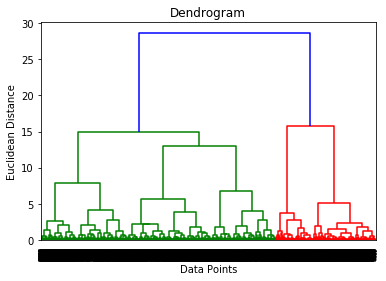

In [12]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

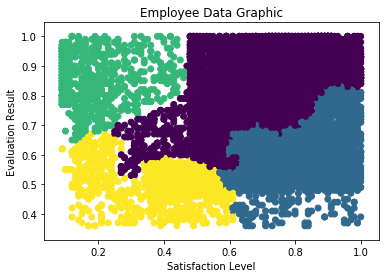

In [13]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
hier.fit(data)

plt.scatter(data['att1'], data['att2'], c = hier.labels_)
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Graphic")
plt.show()

There are 4 clusters:
<br>1. Purple = hard-worker employees with high satisfaction
<br>2. Green = hard-worker employees with low satisfaction
<br>3. Blue = lazy employees with high satisfaction
<br>4. Yelow = lazy employees with low satisfaction

Cluster purple is dominating the data.

## DBSAN

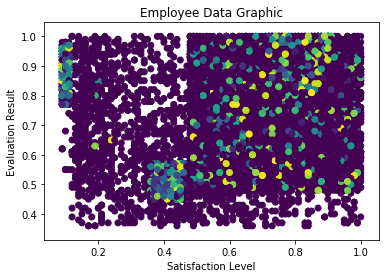

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.0001)
dbscan.fit(data)

plt.scatter(data['att1'], data['att2'], c = dbscan.labels_)
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Graphic")
plt.show()

It is hard to interpret the DBSCAN graphic as the graph is too scatter.